**Práctica Sympy 2**

En base a la simulacion, generar una simulacion lo mas apegado a la realidad del Covid-19, para ello obtener informacion del numero de consultorios y camas disponibles en un hospital del Ecuador. Parametrizar la simulacion para ingresar el numero de pacientes, el numero de consultorios y el numero de camas y algun otro parametro que considere oportuno.

Finalmente generar las siguientes metricas :

Tiempo de espera promedio para cada sala.
Tiempo promedio total que requiere un paciente para ser atendido desde cero.
Cuántos pacientes se atendieron.
Cuántos pacientes se quedaron sin atender y fallecieron.

In [4]:
import simpy
import random
import matplotlib.pyplot as pp
#Maximo de persona en un hospital
MAX_PERSONAS=200
#Numero de camas= 190 c
NUM_CAMAS=190
#Tiempo de consulta = 17min
TIEMPO_CONSULTA=17
#Dias de simulacion = 30
DIAS_SIMULACION=30
#intervalo de llegada de los pacientes 10
INTERVALO_LLEGADA=3
#Cantidad de medicos=93
CANTIDAD_MEDICOS=93

tiempo={}
tiempo_atencion={}
persona_fallecidas={}
personas_atendidas={}
class AtencionPacientes(object):
    def __init__(self, env, num_cama):
        self.env = env
        self.num_cama = num_cama
        self.camas = simpy.Resource(env, num_cama)
        
    def atender_paciente(self, paciente):
        personas_atendidas[env.now]=paciente
        yield self.env.timeout(random.randint(TIEMPO_CONSULTA-2, TIEMPO_CONSULTA+2))
        print("El paciente se termino de atender: ", paciente, " tiempo de salida: ", self.env.now)
        tiempo_atencion[paciente]=env.now
        
    
def Ingreso_Paciente(env, paciente, consulta):
    llegada= env.now
    #La variable riesgo representa los estados de ingreso de los pacientes
    #ROJO= Signos y sintomas grave(60-100)
    #AMARILLO=Signos estables con factores de riesgo(30-60)
    #VERDE= Paciente estable, sin factor de riesgo(1-30)
    riesgo= random.randint(1,100)
    print('Ingreso del paciente con Covid-19 %s a la hora %.2f.' % (paciente, env.now))
    if(riesgo<60):
        with consulta.camas.request() as cama:
            yield env.process(consulta.atender_paciente(paciente))
            print('Paciente [%s] a finalizado la consulta a las %.2f.' % (paciente, env.now))
            tiempo[paciente]=env.now
            dias_esperando = random.randint(1,5) #Numero de dias maximo que puede esperar sin ser asignado a una cama dentro del hospital
            requerimiento = yield cama | env.timeout(dias_esperando) #Asignar un tiempo de espera
            wait = env.now - llegada
            if cama in requerimiento:
                print("Al paciente: ", paciente, " se le asigna una CAMA ")
                riesgo = random.randint(1,100)
                if(riesgo>60):
                    persona_fallecidas[env.now]=persona_fallecidas[env.now]+ 1 if env.now in persona_fallecidas else  1
                else:
                    print("El paciente",paciente,"espero", wait, "dias y fallece")
    else:
        print("El paciente no tiene COVID-19:",paciente,"estado verde")
def ejecutar(env, intervalo_llegada, max_personas):
    consulta=AtencionPacientes(env, NUM_CAMAS)
    for i in range(max_personas):
        env.process(Ingreso_Paciente(env,i, consulta))
        while True:
            yield env.timeout(random.randint(intervalo_llegada-3, intervalo_llegada+3))
            i+=1
            env.process(Ingreso_Paciente(env,i, consulta))
                
env=simpy.Environment()
env.process(ejecutar(env,INTERVALO_LLEGADA,MAX_PERSONAS))

env.run(until =DIAS_SIMULACION)
s=0
st=0
print("Tiempo promedio")
for i in tiempo:
    s =i
    st=st+s
tpromedio=st/len(tiempo)
print(tpromedio)
print("Personas fallecidas: ")
print(persona_fallecidas)
print("Personas atendidas: ")
print(personas_atendidas)
print("Tiempo de atencion: ")
print(tiempo_atencion)

Ingreso del paciente con Covid-19 0 a la hora 0.00.
El paciente no tiene COVID-19: 0 estado verde
Ingreso del paciente con Covid-19 1 a la hora 2.00.
Ingreso del paciente con Covid-19 2 a la hora 2.00.
Ingreso del paciente con Covid-19 3 a la hora 3.00.
Ingreso del paciente con Covid-19 4 a la hora 4.00.
El paciente no tiene COVID-19: 4 estado verde
Ingreso del paciente con Covid-19 5 a la hora 5.00.
El paciente no tiene COVID-19: 5 estado verde
Ingreso del paciente con Covid-19 6 a la hora 5.00.
Ingreso del paciente con Covid-19 7 a la hora 7.00.
Ingreso del paciente con Covid-19 8 a la hora 11.00.
Ingreso del paciente con Covid-19 9 a la hora 15.00.
El paciente no tiene COVID-19: 9 estado verde
El paciente se termino de atender:  1  tiempo de salida:  18
Ingreso del paciente con Covid-19 10 a la hora 18.00.
Paciente [1] a finalizado la consulta a las 18.00.
Al paciente:  1  se le asigna una CAMA 
El paciente 1 espero 16 dias y fallece
El paciente se termino de atender:  3  tiempo de 

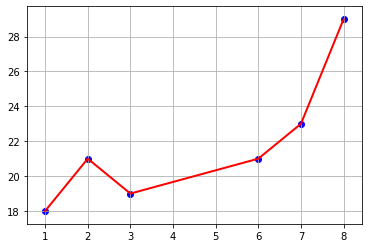

In [5]:
datos=sorted(tiempo_atencion.items())
x, y =zip(*datos)
pp.plot(x,y,linewidth=2,color='red')
pp.scatter(x,y,color='blue')
pp.grid(True)
pp.show()

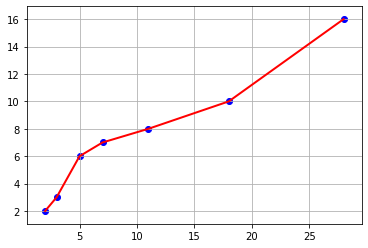

In [7]:
datos=sorted(personas_atendidas.items())
x, y =zip(*datos)
pp.plot(x,y,linewidth=2,color='red')
pp.scatter(x,y,color='blue')
pp.grid(True)
pp.show()